# Real Estate Insights: Uncovering Investment Opportunities  

### Description  
You are a Fintech professional at a leading investment firm, and your team is responsible for generating quarterly reports for a client who invests in real estate. The client has a large portfolio of properties across the United States and needs to identify areas with the highest return on investment. Your task is to analyze a dataset of property sales and identify trends, patterns, and insights that will inform investment decisions.

### Tasks  
- **Data Wrangling:** Using the 'Date' column, extract the quarter and year of the sale. Create a new column 'Sale Quarter' in the format 'Q1 2020'.
- **Data Analysis:** Calculate the total sales, average sale price, and return on investment (ROI) for each region and property type. ROI is calculated as (Sale Price - Purchase Price) / Purchase Price.
- **Data Visualization:** Create a dashboard to visualize the top-performing regions and property types, and identify areas with the highest growth potential.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # only needed for advanced plotting
import matplotlib as mpl # only needed to get version
import sys

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)
print('matplotlib version: ' + mpl.__version__)

Python version 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
Pandas version 2.2.1
Numpy version 1.26.4
matplotlib version: 3.8.4


# The Data  

The dataset contains real estate sales data, comprising 10,000 records of property sales across the United States. The data provides insights into the real estate market, allowing for analysis of sales trends, investment opportunities, and regional performance.  

### Columns:  
- **Region:** The region where the property is located (Northeast, Southwest, West, Southeast)
- **Property Type:** The type of property (Residential, Commercial, Industrial)
- **Sale Price:** The sale price of the property
- **Purchase Price:** The purchase price of the property
- **Date:** The date the property was sold
- **Location:** The location of the property (Urban, Rural, Suburban)

In [2]:
# set the seed
np.random.seed(0)

data = {
    'Region': np.random.choice(['Northeast', 'Southwest', 'West', 'Southeast'], size=10000),
    'Property Type': np.random.choice(['Residential', 'Commercial', 'Industrial'], size=10000),
    'Sale Price': np.random.randint(100000, 1000000, size=10000),
    'Purchase Price': np.random.randint(80000, 900000, size=10000),
    'Date': pd.date_range('2020-01-01', periods=10000, freq='D'),
    'Location': np.random.choice(['Urban', 'Rural', 'Suburban'], size=10000)
}

df = pd.DataFrame(data)
df.head()

,Region,Property Type,Sale Price,Purchase Price,Date,Location
0,Northeast,Commercial,218584,773265,2020-01-01,Rural
1,Southeast,Industrial,178913,131066,2020-01-02,Suburban
2,Southwest,Residential,736016,736997,2020-01-03,Suburban
3,Northeast,Industrial,408411,603822,2020-01-04,Suburban
4,Southeast,Industrial,531722,280768,2020-01-05,Rural


Let us take a look at the data types. The code to generate the data was pretty basic, so I am not expecting any issues with the data types for this tutorial.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          10000 non-null  object        
 1   Property Type   10000 non-null  object        
 2   Sale Price      10000 non-null  int32         
 3   Purchase Price  10000 non-null  int32         
 4   Date            10000 non-null  datetime64[ns]
 5   Location        10000 non-null  object        
dtypes: datetime64[ns](1), int32(2), object(3)
memory usage: 390.8+ KB


# Data Wrangling:  

Using the 'Date' column, extract the quarter and year of the sale. Create a new column 'Sale Quarter' in the format 'Q1 2020'.

We can extract the day, the year, the month, and yes even the quarter from a date object.  

``` python
.dt.year: extracts the year
.dt.month: extracts the month
.dt.day: extracts the day
.dt.hour: extracts the hour
.dt.minute: extracts the minute
.dt.second: extracts the second
.dt.microsecond: extracts the microsecond
.dt.quarter: extracts the quarter (Q1, Q2, Q3, or Q4)
.dt.dayofweek: extracts the day of the week (Monday=0, ..., Sunday=6)
.dt.dayofyear: extracts the day of the year the year
.dt.weekofyear: extracts the week of the year
.dt.days_in_month: The number of days in the month of the datetime
```

In [4]:
# let us verify quarter works
df['Date'].dt.quarter.unique()

array([1, 2, 3, 4])

**Method #1:** Make sure to convert numerical columns into strings

In [5]:
df['Sale Quarter'] = "Q" + df['Date'].dt.quarter.astype('str') + " " + df['Date'].dt.year.astype('str')

df.head()

,Region,Property Type,Sale Price,Purchase Price,Date,Location,Sale Quarter
0,Northeast,Commercial,218584,773265,2020-01-01,Rural,Q1 2020
1,Southeast,Industrial,178913,131066,2020-01-02,Suburban,Q1 2020
2,Southwest,Residential,736016,736997,2020-01-03,Suburban,Q1 2020
3,Northeast,Industrial,408411,603822,2020-01-04,Suburban,Q1 2020
4,Southeast,Industrial,531722,280768,2020-01-05,Rural,Q1 2020


**Method #2:** When using apply, do not use `.dt` to access the dates.

In [6]:
df['Sale Quarter'] = df['Date'].apply(lambda x: "Q{} {}".format(x.quarter, x.year))

df.head()

,Region,Property Type,Sale Price,Purchase Price,Date,Location,Sale Quarter
0,Northeast,Commercial,218584,773265,2020-01-01,Rural,Q1 2020
1,Southeast,Industrial,178913,131066,2020-01-02,Suburban,Q1 2020
2,Southwest,Residential,736016,736997,2020-01-03,Suburban,Q1 2020
3,Northeast,Industrial,408411,603822,2020-01-04,Suburban,Q1 2020
4,Southeast,Industrial,531722,280768,2020-01-05,Rural,Q1 2020


# Data Analysis:  

Calculate the total sales, average sale price, and return on investment (ROI) for each region and property type.  

```ROI is calculated as (Sale Price - Purchase Price) / Purchase Price.```

We need to first calculate the ROI and add it to our dataframe.

In [7]:
df['ROI'] = (df["Sale Price"] - df["Purchase Price"]) / df["Purchase Price"]

df.head()

,Region,Property Type,Sale Price,Purchase Price,Date,Location,Sale Quarter,ROI
0,Northeast,Commercial,218584,773265,2020-01-01,Rural,Q1 2020,-0.717323
1,Southeast,Industrial,178913,131066,2020-01-02,Suburban,Q1 2020,0.365060
2,Southwest,Residential,736016,736997,2020-01-03,Suburban,Q1 2020,-0.001331
3,Northeast,Industrial,408411,603822,2020-01-04,Suburban,Q1 2020,-0.323624
4,Southeast,Industrial,531722,280768,2020-01-05,Rural,Q1 2020,0.893813


In [8]:
# create group object
group = df.groupby(['Region','Property Type'])

# total sales, average sale price, and return on investment (ROI) for each region and property type
stats = group.agg(
     total_sales=pd.NamedAgg(column="Sale Price", aggfunc="sum"),
     avg_sale_price=pd.NamedAgg(column="Sale Price", aggfunc="mean"),
     avg_roi=pd.NamedAgg(column="ROI", aggfunc="mean")
)

stats

total_sales  avg_sale_price   avg_roi
Region    Property Type                                       
Northeast Commercial       478204953   543414.719318  0.569722
          Industrial       441306378   545496.140915  0.613538
          Residential      445531386   544659.396088  0.542753
Southeast Commercial       438267095   552669.728878  0.585154
          Industrial       484245809   547170.405650  0.702109
          Residential      467827932   553642.523077  0.693283
Southwest Commercial       487230479   567867.691142  0.720646
          Industrial       468987824   552400.263840  0.602655
          Residential      468436616   547879.083041  0.626235
West      Commercial       426445537   551675.985770  0.631625
          Industrial       444369230   528381.961950  0.493232
          Residential      418329316   526863.118388  0.569282

# Data Visualization:  

Create a dashboard to visualize the top-performing regions and property types, and identify areas with the highest growth potential.

Looking at the dashboard below, here are some key findings:  
- Southeast (industrial and residential) and Southwest commercial have the best ROI
- Northeast commercial is the most expensive real estate sold but it has a very low ROI

Take note of all the MatPlotLib code I used to customize the plot, see how you can make use of it on your next visualization.

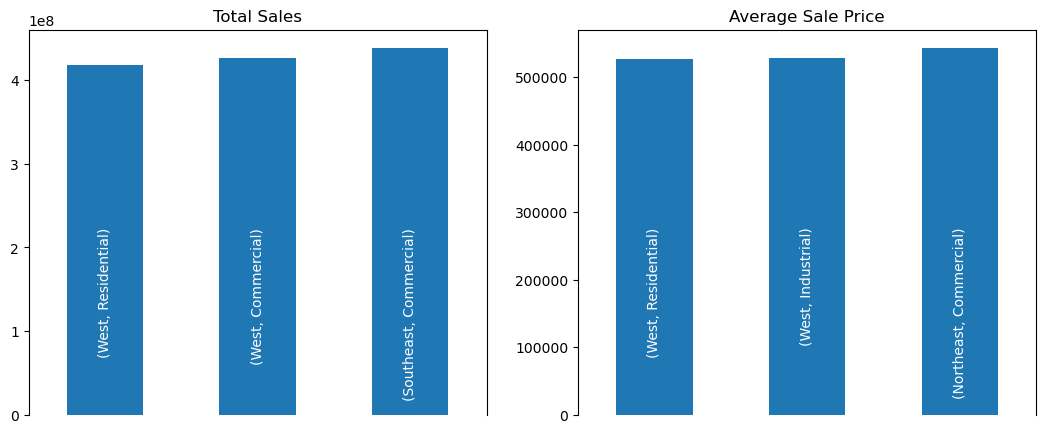

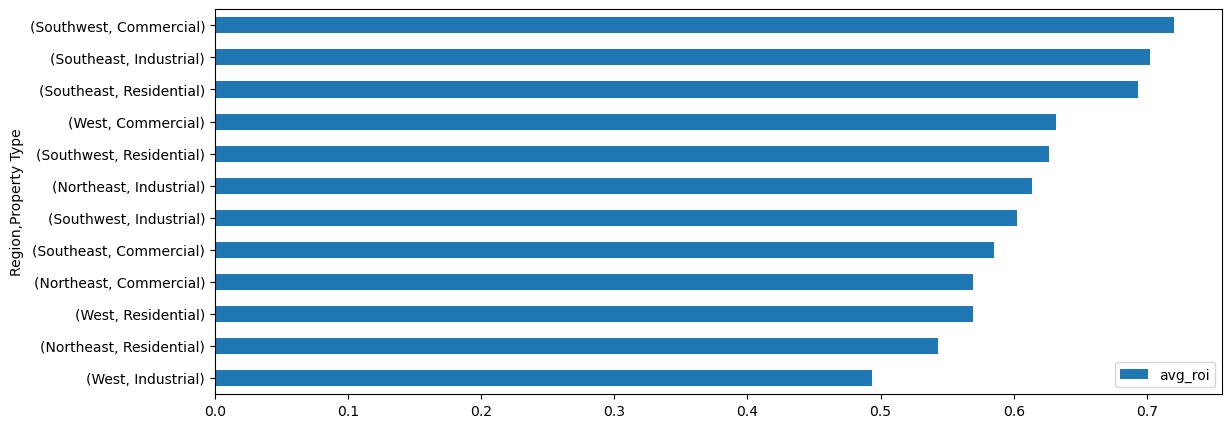

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
fig.subplots_adjust(hspace=0.25) ## Create space between plots

# Chart 1
stats[['avg_roi']].sort_values(by='avg_roi').plot.barh(figsize=(13, 5))

# Chart 2
stats[['total_sales']].sort_values(by='total_sales').head(3).plot.bar(ax=axes[0], legend=False)

# Chart 3
stats[['avg_sale_price']].sort_values(by='avg_sale_price').head(3).plot.bar(ax=axes[1], legend=False)

## customize viz ##

# Move the x-axis to the top of the plot
axes[0].spines['bottom'].set_position(('axes', 0.5))
axes[1].spines['bottom'].set_position(('axes', 0.5))

# hide ticks
axes[0].tick_params(axis='x', which='both', length=0)
axes[1].tick_params(axis='x', which='both', length=0)
axes[0].spines['bottom'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)

# hide labels
axes[0].set_xlabel('')
axes[1].set_xlabel('')

# Rotate the x-axis labels 90 degrees and change text to white
axes[0].tick_params(axis='x', rotation=90, labelcolor='white')
axes[1].tick_params(axis='x', rotation=90, labelcolor='white')

# set titles to top two charts
axes[0].set_title('Total Sales')
axes[1].set_title('Average Sale Price');

# Summary:  
The tutorial demonstrates how to extract insights from a real estate sales dataset using Pandas. It starts by creating a sample dataset and then performs data wrangling, analysis, and visualization to identify top-performing regions and property types.

### Key Takeaways:  
- Extracted the quarter and year from the 'Date' column and created a new 'Sale Quarter' column.
- Converted numerical columns to strings for proper formatting.
- Calculated the return on investment (ROI) for each property.
- Grouped data by region and property type to calculate total sales, average sale price, and average ROI.
- Created a dashboard with three charts to visualize top-performing regions and property types.
- Customized the plots using MatPlotLib to enhance visualization.

<p class="text-muted">This tutorial was created by <a href="https://www.hedaro.com" target="_blank"><strong>HEDARO</strong></a></p>